In [1]:
from pyclouds.ccfm import cloudbase

In [2]:
from pycfd.reference.atmospheric_flow import stratification_profiles, saturation_calculation

ambient_stratification = stratification_profiles.Soong1973Dry()
environment = {
    'T_e': ambient_stratification.temp, 
    'p_e': ambient_stratification.p 
}
constants = {
    'R_d': ambient_stratification.gas_properties.R(), 
    'cp_d': ambient_stratification.gas_properties.cp(), 
    'g': ambient_stratification.g 
}

In [3]:
z_points = numpy.linspace(100., 4e3, 500)

w0 = 0.1
T0 = ambient_stratification.temp(0.0) + 0.2
# r, w, T, q_v, q_r, q_l, q_i
initial_condition = [500.0, w0, T0, 0.00, 0., 0., 0.]

RKFehlberg terminated at t=1827.25


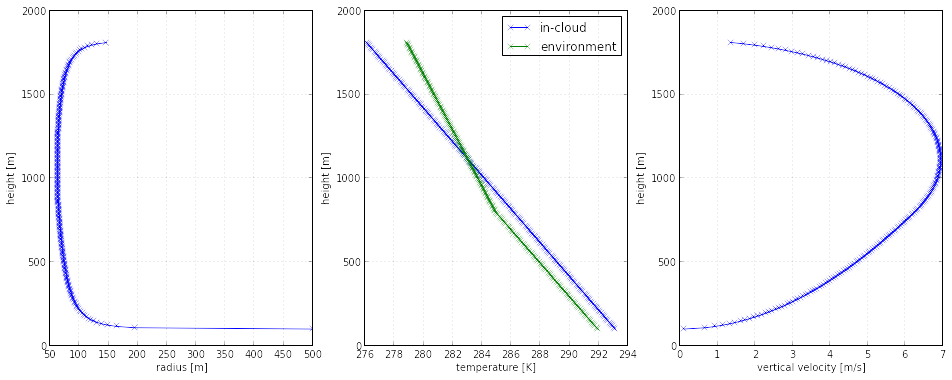

In [6]:
from pyclouds import cloud_equations, cloud_microphysics, plotting

microphysics = cloud_microphysics.moist_adjustment

cloud_model = cloud_equations.Wagner2009(environment=environment, constants=constants, D=0.0, microphysics=microphysics)
F, z = cloud_model.integrate(initial_condition, z_points)
plotting.profile_plot(F, z, Te=ambient_stratification.temp)